In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 77.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

from matplotlib.cm import get_cmap
warnings.filterwarnings("ignore")

# Temperature


In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for mam season
mam_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 3) & (list_hw['Starting_Date'].dt.month <= 5)]
mam_hw_list.reset_index(inplace=True,drop=True)
mam_hw_list

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1973-03-31,1973-04-05,6
3,1973-04-07,1973-04-10,4
4,1973-04-15,1973-04-19,5
...,...,...,...
99,2023-05-29,2023-06-08,11
100,2024-04-01,2024-04-06,6
101,2024-04-12,2024-05-05,24
102,2024-05-14,2024-05-17,4


In [ ]:
# @title Event data for composite analysis-anomaly


import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

anom_list=[]

for i in tqdm(range(len(mam_hw_list['Starting_Date']))):
  year=mam_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(mam_hw_list['Starting_Date'][i])
  end_time = str(mam_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# shum ################
  # Load the files
  ds_temp = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/temperature_levels(1000-900)/temp(1000-900)-{year}.nc")
  temp_clim=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/shum&temp/temp_climatology(1000-900)-mam.nc')

  ds_temp=ds_temp.sel(valid_time=time_range)
  ds_temp=ds_temp.mean(dim='valid_time',skipna=True)
  temp_anom=ds_temp-temp_clim
  temp_anom=temp_anom.assign_coords(event_no=event_no)
  anom_list.append(temp_anom)
# lshf_anom
temp_events_anom_mam=xr.concat(anom_list,dim='event_no')
temp_events_anom_mam.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_events_anom-mam.nc')



  0%|          | 0/104 [00:00<?, ?it/s]

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for jjas season
jjas_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 6) & (list_hw['Starting_Date'].dt.month <= 9)]
jjas_hw_list.reset_index(inplace=True,drop=True)
jjas_hw_list


,Starting_Date,Ending_Date,Duration
0,1972-06-06,1972-06-12,7
1,1972-07-11,1972-07-13,3
2,1972-07-23,1972-07-26,4
3,1972-09-18,1972-09-20,3
4,1977-09-05,1977-09-07,3
...,...,...,...
130,2024-07-13,2024-07-31,19
131,2024-08-13,2024-08-15,3
132,2024-08-29,2024-08-31,3
133,2024-09-02,2024-09-13,12


In [ ]:
# @title Event data for composite analysis-anomaly


import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

anom_list=[]

for i in tqdm(range(len(jjas_hw_list['Starting_Date']))):
  year=jjas_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(jjas_hw_list['Starting_Date'][i])
  end_time = str(jjas_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# shum ################
  # Load the files
  ds_temp = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/temperature_levels(1000-900)/temp(1000-900)-{year}.nc")
  temp_clim=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/shum&temp/temp_climatology(1000-900)-jjas.nc')

  ds_temp=ds_temp.sel(valid_time=time_range)
  ds_temp=ds_temp.mean(dim='valid_time',skipna=True)
  temp_anom=ds_temp-temp_clim
  temp_anom=temp_anom.assign_coords(event_no=event_no)
  anom_list.append(temp_anom)
# lshf_anom
temp_events_anom_jjas=xr.concat(anom_list,dim='event_no')
temp_events_anom_jjas.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_events_anom-jjas.nc')


  0%|          | 0/135 [00:00<?, ?it/s]

In [ ]:
temp_events_anom_jjas

<xarray.Dataset> Size: 55MB
Dimensions:         (event_no: 135, pressure_level: 5, latitude: 133,
                     longitude: 153)
Coordinates:
    number          int64 8B 0
  * pressure_level  (pressure_level) float64 40B 1e+03 975.0 950.0 925.0 900.0
  * latitude        (latitude) float64 1kB 38.0 37.75 37.5 ... 5.5 5.25 5.0
  * longitude       (longitude) float64 1kB 60.0 60.25 60.5 ... 97.5 97.75 98.0
  * event_no        (event_no) int64 1kB 1 2 3 4 5 6 ... 130 131 132 133 134 135
Data variables:
    t               (event_no, pressure_level, latitude, longitude) float32 55MB ...

# Specific humidity


In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for mam season
mam_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 3) & (list_hw['Starting_Date'].dt.month <= 5)]
mam_hw_list.reset_index(inplace=True,drop=True)
mam_hw_list

,Starting_Date,Ending_Date,Duration
0,1972-04-23,1972-04-25,3
1,1972-05-08,1972-05-19,12
2,1973-03-31,1973-04-05,6
3,1973-04-07,1973-04-10,4
4,1973-04-15,1973-04-19,5
...,...,...,...
99,2023-05-29,2023-06-08,11
100,2024-04-01,2024-04-06,6
101,2024-04-12,2024-05-05,24
102,2024-05-14,2024-05-17,4


In [ ]:
# @title Event data for composite analysis-anomaly

import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

anom_list=[]

for i in tqdm(range(len(mam_hw_list['Starting_Date']))):
  year=mam_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(mam_hw_list['Starting_Date'][i])
  end_time = str(mam_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# shum ################
  # Load the files
  ds_shum = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/specific_humidity/shum-{year}.nc")
  shum_clim=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/shum&temp/shum_climatology(1000-900)-mam.nc')

  ds_shum=ds_shum.sel(valid_time=time_range)
  ds_shum=ds_shum.mean(dim='valid_time',skipna=True)
  shum_anom=ds_shum-shum_clim
  shum_anom=shum_anom.assign_coords(event_no=event_no)
  anom_list.append(shum_anom)
# lshf_anom
shum_events_anom_mam=xr.concat(anom_list,dim='event_no')
shum_events_anom_mam.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/shum_events_anom-mam.nc')


  0%|          | 0/104 [00:00<?, ?it/s]

In [ ]:
# @title Heat date list
list_hw=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/HW_list_rolling_def.csv')
list_hw['Starting_Date'] = pd.to_datetime(list_hw["Starting_Date"])
list_hw['Ending_Date'] = pd.to_datetime(list_hw["Ending_Date"])

# separate hw for jjas season
jjas_hw_list =list_hw[(list_hw['Starting_Date'].dt.month >= 6) & (list_hw['Starting_Date'].dt.month <= 9)]
jjas_hw_list.reset_index(inplace=True,drop=True)
jjas_hw_list


,Starting_Date,Ending_Date,Duration
0,1972-06-06,1972-06-12,7
1,1972-07-11,1972-07-13,3
2,1972-07-23,1972-07-26,4
3,1972-09-18,1972-09-20,3
4,1977-09-05,1977-09-07,3
...,...,...,...
130,2024-07-13,2024-07-31,19
131,2024-08-13,2024-08-15,3
132,2024-08-29,2024-08-31,3
133,2024-09-02,2024-09-13,12


In [ ]:
# @title Event data for composite analysis-anomaly


import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
import numpy as np
import matplotlib.colors as colors

anom_list=[]

for i in tqdm(range(len(jjas_hw_list['Starting_Date']))):
  year=jjas_hw_list['Starting_Date'].dt.year.iloc[i]
  start_time =str(jjas_hw_list['Starting_Date'][i])
  end_time = str(jjas_hw_list['Ending_Date'][i])
  start_time =str(np.datetime64(start_time) - np.timedelta64(6, 'h')) # Substracting 6hrs to convert to BD time.
  end_time =str(np.datetime64(end_time) - np.timedelta64(6, 'h')+ np.timedelta64(24,'h')) # Adding 24hrs to include the end date too.
  time_range=slice(start_time,end_time)
  event_no=i+1
  ###################################
  ############# shum ################
  # Load the files
  ds_shum = xr.open_dataset(f"/content/drive/MyDrive/AP_HW/ERA5 Data/specific_humidity/shum-{year}.nc")
  shum_clim=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/climatology/data/shum&temp/shum_climatology(1000-900)-jjas.nc')

  ds_shum=ds_shum.sel(valid_time=time_range)
  ds_shum=ds_shum.mean(dim='valid_time',skipna=True)
  shum_anom=ds_shum-shum_clim
  shum_anom=shum_anom.assign_coords(event_no=event_no)
  anom_list.append(shum_anom)
# lshf_anom
shum_events_anom_jjas=xr.concat(anom_list,dim='event_no')
shum_events_anom_jjas.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/shum_events_anom-jjas.nc')


  0%|          | 0/135 [00:00<?, ?it/s]

# Combine Plot


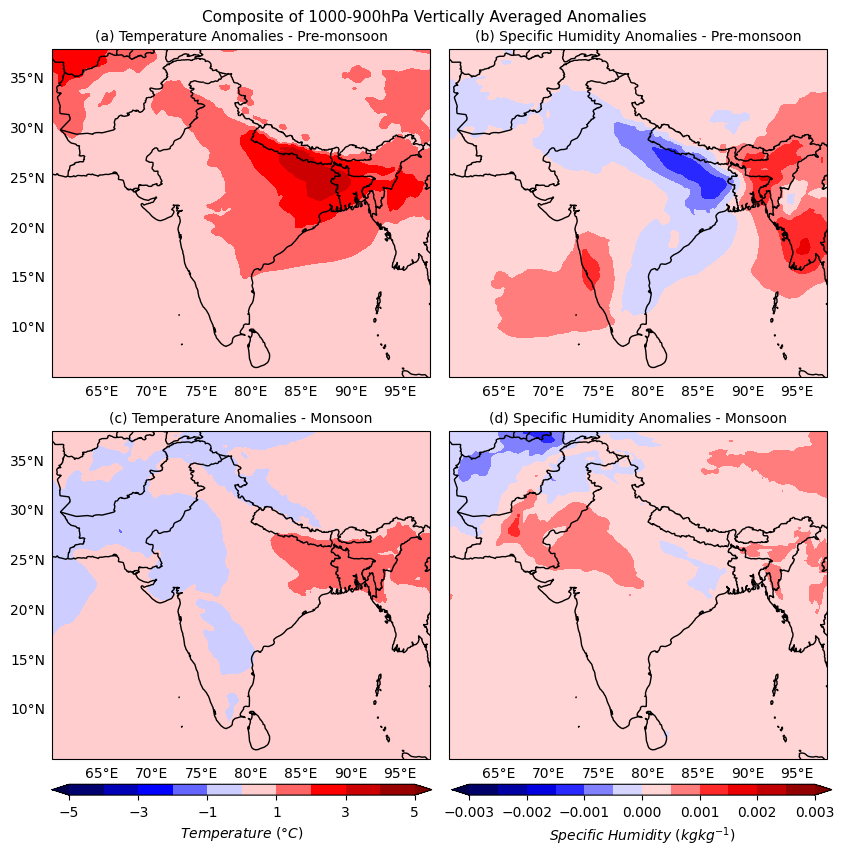

In [ ]:
levels_temp=np.arange(-5, 5+ 0.0001, 1)
levels_shum=np.arange(-0.003, 0.003 + 0.0001, 0.0005)
projection=ccrs.PlateCarree()
fig,axes=plt.subplots(ncols=2,nrows=2,subplot_kw={'projection':projection},figsize=(10, 25))

# 850hpa premonsoon temp
ax=axes.flat[0]
temp=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_events_anom-mam.nc')

# # Spatial region
lat_range=slice(38,5)
lon_range=slice(60,98)
temp=temp.sel(latitude=lat_range,longitude=lon_range)
temp_anom=temp.mean(dim='event_no',skipna=True)
temp_anom=temp_anom.mean(dim='pressure_level',skipna=True)

latitude=temp_anom['latitude'].values
longitude=temp_anom['longitude'].values
contourf_temp=ax.contourf(longitude,latitude,temp_anom.t,levels=levels_temp,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['left','bottom'],visible=False)
ax.coastlines()
ax.set_title("(a) Temperature Anomalies - Pre-monsoon",fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))

# 850hpa premonsoon shum
ax=axes.flat[1]
shum=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/shum_events_anom-mam.nc')
# # Spatial region
lat_range=slice(38,5)
lon_range=slice(60,98)
shum=shum.sel(latitude=lat_range,longitude=lon_range)
shum_anom=shum.mean(dim='event_no',skipna=True)
shum_anom=shum_anom.mean(dim='pressure_level',skipna=True)

latitude=shum_anom['latitude'].values
longitude=shum_anom['longitude'].values
contourf_shum=ax.contourf(longitude,latitude,shum_anom.q,levels=levels_shum,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['bottom'],visible=False)
ax.coastlines()
ax.set_title("(b) Specific Humidity Anomalies - Pre-monsoon",fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))


# 850hpa monsoon temp
ax=axes.flat[2]
temp=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/temp_events_anom-jjas.nc')
# # Spatial region
lat_range=slice(38,5)
lon_range=slice(60,98)
temp=temp.sel(latitude=lat_range,longitude=lon_range)
temp_anom=temp.mean(dim='event_no',skipna=True)
temp_anom=temp_anom.mean(dim='pressure_level',skipna=True)

latitude=temp_anom['latitude'].values
longitude=temp_anom['longitude'].values
contourf_temp=ax.contourf(longitude,latitude,temp_anom.t,levels=levels_temp,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['left','bottom'],visible=False)
ax.coastlines()
ax.set_title("(c) Temperature Anomalies - Monsoon",fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))

# 850hpa monsoon shum
ax=axes.flat[3]
shum=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/temp&shum/data/shum_events_anom-jjas.nc')
# # Spatial region
lat_range=slice(38,5)
lon_range=slice(60,98)
shum=shum.sel(latitude=lat_range,longitude=lon_range)
shum_anom=shum.mean(dim='event_no',skipna=True)
shum_anom=shum_anom.mean(dim='pressure_level',skipna=True)

latitude=shum_anom['latitude'].values
longitude=shum_anom['longitude'].values
contourf_shum=ax.contourf(longitude,latitude,shum_anom.q,levels=levels_shum,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")

ax.gridlines(draw_labels=['bottom'],visible=False)
ax.coastlines()
ax.set_title("(d) Specific Humidity Anomalies - Monsoon",fontsize=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))

#  contour levels for temperature
cbar_temp = plt.colorbar(contourf_temp, ax=axes, orientation='horizontal', pad=0.01, fraction=0.01, aspect=35, label="${Temperature}\ ({°C})$")
cbar_temp.set_ticks(levels_temp[::2])  # Set the colorbar ticks to match the levels used in contour plots
# Adjust colorbar position
cbar_temp.ax.set_position([0.125, 0.075, 0.38, 0.025]) # [left, bottom, width, height]

#  contour levels for shum
cbar_shum = plt.colorbar(contourf_shum, ax=axes, orientation='horizontal', pad=0.01, fraction=0.01, aspect=35, label="${Specific\ Humidity}\ ({kg}{kg}^{-1})$")
cbar_shum.set_ticks(levels_shum[::2])  # colorbar ticks
# Adjust colorbar position
cbar_shum.ax.set_position([0.525, 0.075, 0.38, 0.025]) # [left, bottom, width, height]


plt.subplots_adjust( wspace=0.05,hspace=-0.76,top=0.9)
plt.suptitle('Composite of 1000-900hPa Vertically Averaged Anomalies ', x=0.5, y=0.41,fontsize=11)
plt.show()

# fig.savefig('/content/drive/MyDrive/AP_HW/Results/specific_humidity/composite_of_specific_humidity_anomaly.png', dpi=300, bbox_inches='tight')

In [ ]:
print('done')

done
